  XGBoost stands for "Extreme Gradient Boosting" and it is an implementation of gradient boosting machines. The XGBoost is a popular supervised machine learning model with characteristics like fast in computation, parallelization, and better performance. You can find more about the model in this link. In this post, we'll learn how to define the XGBRegressor model and predict regression data in Python.

*The tutorial covers:
- Preparing data
- Defining and fitting the model
- Predicting and checking the results

In [1]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

## Preparing data

   We use Boston house-price dataset as regression dataset in this tutorial. After loading the dataset, first, we'll separate data into x - feature and y - label. Then we'll split them into the train and test parts. Here, I'll extract 15 percent of the dataset as test data.

In [2]:
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3)

## Defining and fitting the model

   For the regression problem, we'll use XGBRegressor class of the xgboost package and we can define it with its default parameters. You can also set the new parameter values according to your data characteristics.

In [3]:
# instantiate an XGBoost regressor object 
xgbr = xgb.XGBRegressor(objective ='reg:squarederror')

In [4]:
# Next, we'll fit the model with train data.

xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

## Predicting and checking the results


After training the model, we'll check the model accuracy with cross-validation method.

In [5]:
scores = cross_val_score(xgbr, xtrain,ytrain,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
# Mean cross-validataion score: 0.87 

Mean cross-validation score: 0.85


In [6]:
#Cross-validation with a k-fold method can be checked as a following.

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.86


- Both methods show that the model is around 8x %  accurate on average.
Next, we can predict test data and check its accuracy. Here, we'll use MSE and RMSE as accuracy metrics.

In [8]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("MSE: %.2f" % mse)
MSE: 3.35
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 7.24
RMSE: 2.69


- Finally, we'll visualize the original and predicted test data in a plot.

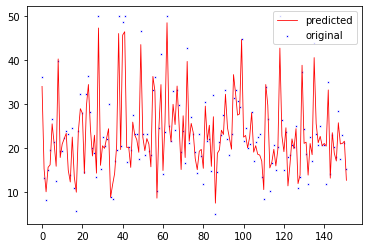

In [9]:
# figure size
x_ax = range(len(ytest))
sns.scatterplot(x_ax, ytest, s=5, color="blue", label="original")
sns.lineplot(x_ax, ypred, lw=0.8, color="red", label="predicted")

_
   In this post, we've briefly learned how to use XGBRegressor to predict regression data in Python. Thank you for reading.
   The full source code is listed below._

In [2]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import numpy as np

# Encoding. ategorical Features

In [1]:
import pandas as pd
import numpy as np

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [3]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [4]:
df.shape

(205, 26)

In [5]:
obj_df[obj_df.isnull().any(axis=1)]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
27,dodge,gas,turbo,NaN,sedan,fwd,front,ohc,four,mpfi
63,mazda,diesel,std,NaN,sedan,fwd,front,ohc,four,idi


In [6]:
obj_df["num_doors"].value_counts()

four    114
two      89
Name: num_doors, dtype: int64

In [9]:
obj_df.groupby("num_doors").num_doors.size()

num_doors
four    114
two      89
Name: num_doors, dtype: int64

In [10]:
obj_df = obj_df.fillna({"num_doors": "most_frequent"})

In [18]:
obj_df["num_cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num_cylinders, dtype: int64

In [19]:
cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [20]:
obj_df.replace(cleanup_nums, inplace=True)
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [21]:
obj_df.dtypes

make               object
fuel_type          object
aspiration         object
num_doors          object
body_style         object
drive_wheels       object
engine_location    object
engine_type        object
num_cylinders       int64
fuel_system        object
dtype: object

# Approach #2 - Label Encoding

In [22]:
obj_df["body_style"] = obj_df["body_style"].astype('category')
obj_df.dtypes

make                 object
fuel_type            object
aspiration           object
num_doors            object
body_style         category
drive_wheels         object
engine_location      object
engine_type          object
num_cylinders         int64
fuel_system          object
dtype: object

In [26]:
obj_df["body_style_cat"] = obj_df["body_style"].cat.codes
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,0
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,0
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,2
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi,3
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi,3


In [24]:
obj_df.body_style_cat.unique()

array([0, 2, 3, 4, 1], dtype=int8)

# Approach #3 - One Hot Encoding

In [25]:
pd.get_dummies(obj_df, columns=["drive_wheels"]).head()

,make,fuel_type,aspiration,num_doors,body_style,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,0,0,1
1,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,0,0,1
2,alfa-romero,gas,std,2,hatchback,front,ohcv,6,mpfi,2,0,0,1
3,audi,gas,std,4,sedan,front,ohc,4,mpfi,3,0,1,0
4,audi,gas,std,4,sedan,front,ohc,5,mpfi,3,1,0,0


In [27]:
pd.get_dummies(obj_df, columns=["body_style", "drive_wheels"], prefix=["body", "drive"]).head()


,make,fuel_type,aspiration,num_doors,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,alfa-romero,gas,std,2,front,dohc,4,mpfi,0,1,0,0,0,0,0,0,1
1,alfa-romero,gas,std,2,front,dohc,4,mpfi,0,1,0,0,0,0,0,0,1
2,alfa-romero,gas,std,2,front,ohcv,6,mpfi,2,0,0,1,0,0,0,0,1
3,audi,gas,std,4,front,ohc,4,mpfi,3,0,0,0,1,0,0,1,0
4,audi,gas,std,4,front,ohc,5,mpfi,3,0,0,0,1,0,1,0,0


# Approach #4 - Custom Binary Encoding

In [28]:
obj_df["engine_type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [30]:
obj_df["OHC_Code"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, 0)

In [32]:
obj_df.OHC_Code.unique()

array([1, 0])

In [33]:
obj_df[["make", "engine_type", "OHC_Code"]].head()

,make,engine_type,OHC_Code
0,alfa-romero,dohc,1
1,alfa-romero,dohc,1
2,alfa-romero,ohcv,1
3,audi,ohc,1
4,audi,ohc,1


# Scikit-Learn

In [34]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
obj_df["make_code"] = lb_make.fit_transform(obj_df["make"])
obj_df[["make", "make_code"]].head(11)

,make,make_code
0,alfa-romero,0
1,alfa-romero,0
2,alfa-romero,0
3,audi,1
4,audi,1
5,audi,1
6,audi,1
7,audi,1
8,audi,1
9,audi,1


In [35]:
obj_df["body_style"].unique()

[convertible, hatchback, sedan, wagon, hardtop]
Categories (5, object): [convertible, hatchback, sedan, wagon, hardtop]

In [36]:
from sklearn.preprocessing import LabelBinarizer

lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(obj_df["body_style"])
pd.DataFrame(lb_results, columns=lb_style.classes_).head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [45]:
obj_df.keys()

Index(['make', 'fuel_type', 'aspiration', 'num_doors', 'body_style',
       'drive_wheels', 'engine_location', 'engine_type', 'num_cylinders',
       'fuel_system', 'body_style_cat', 'OHC_Code', 'make_code'],
      dtype='object')

In [82]:
def lbEnconding(obj):
    class_mapping = {label: idx for idx, label in enumerate(np.unique(obj))}
    #obj_df['body_style_Encoded'] = obj_df['body_style'].map(class_mapping)
    return obj.map(class_mapping)

In [85]:
lbEnconding(obj_df['body_style']).head()

# obj_df[['body_style', "body_style_Encoded"]].head()

0    0
1    0
2    2
3    3
4    3
Name: body_style, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

In [51]:
obj_df.body_style.unique()

[convertible, hatchback, sedan, wagon, hardtop]
Categories (5, object): [convertible, hatchback, sedan, wagon, hardtop]

In [52]:
class_mapping

{'convertible': 0, 'hardtop': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4}

In [64]:
{ v:k  for k, v in class_mapping.items()}

{0: 'convertible', 1: 'hardtop', 2: 'hatchback', 3: 'sedan', 4: 'wagon'}

In [61]:
{k:v for k , v in enumerate(class_mapping)}

{0: 'convertible', 1: 'hardtop', 2: 'hatchback', 3: 'sedan', 4: 'wagon'}

In [70]:
obj_df["body_style_Encoded"].map({ v:k  for k, v in class_mapping.items()})

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: body_style_Encoded, Length: 205, dtype: category
Categories (5, object): [convertible, hardtop, hatchback, sedan, wagon]

In [76]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y=class_le.fit_transform(obj_df['body_style'].values)

In [75]:
# inverse Transform
class_le.inverse_transform(y)

# Advanced Approaches

In [44]:
import category_encoders as ce

# Get a new clean dataframe
obj_df = df.select_dtypes(include=['object']).copy()

# Specify the columns to encode then fit and transform
encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=["engine_type"])
encoder.fit(obj_df, verbose=1)

# Only display the first 8 columns for brevity
encoder.transform(obj_df).iloc[:,0:7].head()

ModuleNotFoundError: No module named 'category_encoders'

# My fst ML Project 

In [86]:
print("Hello. ML")

Hello. ML


In [87]:
from sklearn import datasets

In [104]:
df=datasets.load_iris()

In [105]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [106]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [107]:
iris=pd.DataFrame(iris.data, columns=iris.feature_names)

In [108]:
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [118]:
iris["species"]=df.target

In [120]:
iris.species.unique()

array([0, 1, 2])

In [119]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [121]:
df.target_names[0]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [122]:
iris["species"]=iris["species"].apply( lambda x: df.target_names[x])

In [125]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Digitize

In [4]:
import pandas as pd
import numpy as np
x=np.array(["A", "A", "B", "C"])
bins=np.array([0, 1, 2.5, 4, 10])
inds=np.digitize(x)
inds

TypeError: _digitize_dispatcher() missing 1 required positional argument: 'bins'

# title. 

- itroduction 

$$\large  f(x)= \frac{e^x}{1+e^{-x}}$$

In [1]:
!ls


 Guide to Machine Learning in R for Beginners Logistic Regression.ipynb
8-3-2020-student2017.ipynb
Boston.ipynb
DIR_info_2.ipynb
Data science  Project.docx
DataScience With Python .ipynb
Develop a XGBoost model on SageMaker to Forecast Demand.ipynb
DirInfo.FstProj.pptx
DirInfo_1-Copy1.ipynb
DirInfo_1-Copy2.ipynb
DirInfo_1.ipynb
DirInfo_A.ipynb
DirInfo_Presentation.ipynb
Education Data Mining.ipynb
GD6_clean.csv
GD_Part2_clean.csv
Hello.gv
Hello.gv.svg
IRIS. XGBoost  Multiclass .ipynb
Isamahan.ipynb
MLCourse
MLCourseSlides.pdf
MachineLearning_Eval_Project.ipynb
Make_pipeline.ipynb
Pivot_DF_in_R .ipynb
Plotting Learning Curves.ipynb
R_graph_1-Copy1.ipynb
Random Forest.ipynb
Recursive-Feature-Elimination-RFE-by-Using-Tree-Based-and-Gradient-Boosting-Algorithm
SAuvegarde.ipynb
SKLEARN. & SCIPY.ipynb
Seaborn.ipynb
Sigma.png
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
Workshop Dir_info.pptx
bst_model.pkl
confusion.png
confusion_matrix.png
data
dtest.svm
dtrain.svm
dump.raw

In [2]:
!pwd

/Users/medamin/_Projets/_DataScience/DirectOfInformaiton_Project


In [3]:
!aws 

usage: aws [options] <command> <subcommand> [<subcommand> ...] [parameters]
To see help text, you can run:

  aws help
  aws <command> help
  aws <command> <subcommand> help
aws: error: the following arguments are required: command
